In [1]:
from keras.datasets import cifar10

In [2]:
(X_train_full,y_train_full), (x_test_full,y_test_full) =  cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
X_train_full.shape

(50000, 32, 32, 3)

In [4]:
y_test_full

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [5]:
train_examples = 5000

In [6]:
x_train = X_train_full[:train_examples]

In [7]:
x_train.shape

(5000, 32, 32, 3)

In [8]:
y_train = y_train_full[:train_examples]

In [9]:
y_train.shape

(5000, 1)

In [10]:
x_test_full.shape

(10000, 32, 32, 3)

In [11]:
test_examples = 1000

In [12]:
x_test = x_test_full[:test_examples]

In [13]:
x_test.shape


(1000, 32, 32, 3)

In [14]:
y_test = y_test_full[:test_examples]

In [15]:
from tensorflow.keras.preprocessing.image import img_to_array,array_to_img
from PIL import Image
import numpy as np
def resize_images(images): #inception model accepts data as (75 * 75) but our data is (32 * 32) therefore we are resizing the data
  resized_images = []
  for image in images:
    image = img_to_array(image)
    image = Image.fromarray(image.astype('uint8'))
    image = image.resize((75, 75))
    image = img_to_array(image)
    resized_images.append(image)
  return np.array(resized_images)

In [16]:
x_train = resize_images(x_train)

In [17]:
x_train.shape

(5000, 75, 75, 3)

In [18]:
x_test = resize_images(x_test)

In [19]:
x_test.shape

(1000, 75, 75, 3)

In [20]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [21]:
y_train.shape

(5000, 1)

In [22]:
y_train[1]

array([9], dtype=uint8)

In [23]:
y_train_labels = set(y_train.ravel())

In [24]:
y_train_labels

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [25]:
y_test_labels = set(y_test.ravel())

In [26]:
y_test_labels

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [27]:
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_test,num_classes =10)
y_train = to_categorical(y_train,num_classes =10)

In [28]:
y_test.shape

(1000, 10)

In [29]:
from keras.applications.inception_v3 import InceptionV3


In [30]:
base_model = InceptionV3(weights = 'imagenet',include_top=False, input_shape=(75,75,3))

87910968/87910968 [==============================] - 1s 0us/step


In [31]:
for layer in base_model.layers:
  layer.trainable = False #i am freezing the base layers 

In [32]:
from tensorflow.keras.models import Sequential

In [33]:
model = Sequential()

In [34]:
model.add(base_model)

In [35]:
from tensorflow.keras.layers import Flatten,Dense, Dropout

In [36]:
model.add(Flatten())

In [37]:
model.add(Dense(256, activation='relu'))

In [38]:
model.add(Dropout(0.5))


In [39]:
model.add(Dense(10, activation = 'softmax'))

In [40]:
from tensorflow.keras.optimizers import Adam


In [41]:
adam = Adam(lr = 0.0001)

In [42]:
from keras.backend import categorical_crossentropy
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [43]:
batch_size = 32
epochs = 100


In [44]:
history = model.fit(x_train,y_train,batch_size = batch_size, epochs = epochs, validation_data = (x_test,y_test) )

Epoch 1/100
157/157 [==============================] - 19s 34ms/step - loss: 1.7999 - accuracy: 0.3854 - val_loss: 1.3453 - val_accuracy: 0.5360
Epoch 2/100
157/157 [==============================] - 4s 26ms/step - loss: 1.2496 - accuracy: 0.5704 - val_loss: 1.2680 - val_accuracy: 0.5760
Epoch 3/100
157/157 [==============================] - 3s 22ms/step - loss: 1.0439 - accuracy: 0.6392 - val_loss: 1.2210 - val_accuracy: 0.5920
Epoch 4/100
157/157 [==============================] - 3s 21ms/step - loss: 0.8992 - accuracy: 0.6942 - val_loss: 1.2160 - val_accuracy: 0.5910
Epoch 5/100
157/157 [==============================] - 3s 21ms/step - loss: 0.7572 - accuracy: 0.7348 - val_loss: 1.2291 - val_accuracy: 0.5930
Epoch 6/100
157/157 [==============================] - 4s 24ms/step - loss: 0.6593 - accuracy: 0.7730 - val_loss: 1.2611 - val_accuracy: 0.5790
Epoch 7/100
157/157 [==============================] - 3s 20ms/step - loss: 0.5651 - accuracy: 0.8120 - val_loss: 1.2907 - val_accuracy

In [45]:
import matplotlib.pyplot as plt

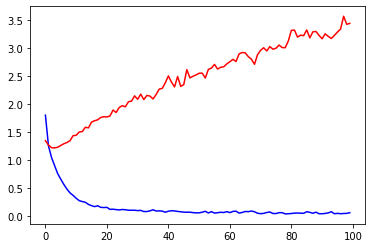

In [46]:
plt.plot(history.history['loss'],c = 'b')
plt.plot(history.history['val_loss'],c = 'r')

# Plotting images from cifar 10 along with the label

In [62]:
class_names = ['airplane','automobile', 'bird', 'cat','deer','dog','frog','horse','ship','truck']

In [107]:
index = np.random.randint(len(X_train_full))
image = X_train_full[index]
label = y_train_full[index][0]

#randomly picked one image from cifar10 dataset

In [108]:
image

array([[[230, 239, 244],
        [231, 240, 245],
        [232, 241, 246],
        ...,
        [207, 225, 235],
        [203, 223, 234],
        [200, 220, 234]],

       [[229, 238, 243],
        [230, 239, 244],
        [231, 240, 245],
        ...,
        [214, 229, 236],
        [208, 225, 234],
        [204, 222, 233]],

       [[228, 237, 242],
        [229, 238, 243],
        [230, 239, 244],
        ...,
        [221, 232, 237],
        [213, 227, 233],
        [207, 223, 233]],

       ...,

       [[100, 145, 171],
        [ 97, 143, 169],
        [104, 150, 176],
        ...,
        [ 60, 114, 156],
        [ 56, 109, 154],
        [ 65, 117, 160]],

       [[106, 149, 176],
        [108, 152, 179],
        [108, 151, 178],
        ...,
        [ 60, 122, 164],
        [ 53, 114, 159],
        [ 54, 114, 159]],

       [[113, 154, 182],
        [112, 153, 181],
        [103, 144, 172],
        ...,
        [ 59, 126, 169],
        [ 49, 116, 160],
        [ 42, 108, 154]]

In [109]:
label

8

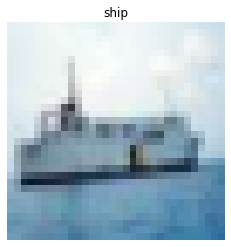

In [110]:
plt.imshow(image)
plt.title(class_names[label])
plt.axis('off')
plt.show()

In [111]:
image.shape

(32, 32, 3)

In [112]:
from tensorflow.keras.preprocessing.image import img_to_array,array_to_img
from PIL import Image
import numpy as np
def resize_single_images(image): #inception model accepts data as (75 * 75) but our data is (32 * 32) therefore we are resizing the data
  image = img_to_array(image)
  image = Image.fromarray(image.astype('uint8'))
  image = image.resize((75, 75))
  image = img_to_array(image)
  return np.array(image)

In [113]:
image = resize_single_images(image)

In [114]:
image.shape

(75, 75, 3)

In [115]:
image = image.astype('float32') / 255


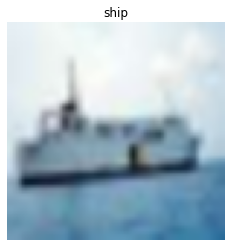

In [116]:
plt.imshow(image)
plt.title(class_names[label])
plt.axis('off')
plt.show()

In [117]:
image.shape

(75, 75, 3)

In [118]:
image = image.reshape((1,75,75,3))

In [119]:
image.shape

(1, 75, 75, 3)

In [120]:
label = model.predict(image)

1/1 [==============================] - 0s 32ms/step


In [121]:
label

array([[1.20647954e-07, 6.96902301e-12, 1.37899225e-14, 1.71684593e-13,
        2.76264984e-07, 1.13578669e-15, 2.74649606e-13, 2.17284093e-08,
        9.99914646e-01, 8.48933705e-05]], dtype=float32)

In [122]:
label_index = np.argmax(label)

In [123]:
label_index

8

In [124]:
class_names[label_index]

'ship'